In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv",header=0)

## Sampling Rate, Number Of Samples And Sample Spacing

In [3]:
S = 200.0 # sampling rate

T = 1.0/S # sample spacing

N = 14.0/T # number of samples

In [4]:
# time = np.linspace(0.0,N*T,N)
time = []

for i in range(len(data["Voltage"])):
    time.append(i*T)

In [5]:
data["Time"] = time

In [6]:
data

Voltage    Time
0     0.000520   0.000
1     0.000511   0.005
2     0.000513   0.010
3     0.000523   0.015
4     0.000520   0.020
5     0.000514   0.025
6     0.000517   0.030
7     0.000530   0.035
8     0.000540   0.040
9     0.000533   0.045
10    0.000523   0.050
11    0.000533   0.055
12    0.000544   0.060
13    0.000546   0.065
14    0.000507   0.070
15    0.000455   0.075
16    0.000439   0.080
17    0.000467   0.085
18    0.000521   0.090
19    0.000566   0.095
20    0.000584   0.100
21    0.000559   0.105
22    0.000528   0.110
23    0.000498   0.115
24    0.000516   0.120
25    0.000554   0.125
26    0.000550   0.130
27    0.000532   0.135
28    0.000502   0.140
29    0.000505   0.145
...        ...     ...
2770  0.000538  13.850
2771  0.000531  13.855
2772  0.000532  13.860
2773  0.000519  13.865
2774  0.000529  13.870
2775  0.000536  13.875
2776  0.000532  13.880
2777  0.000528  13.885
2778  0.000520  13.890
2779  0.000528  13.895
2780  0.000517  13.900
2781  0.000525  13.905
2782  0.000532  13.910
2783  0.000517  13.915
2784  0.000533  13.920
2785  0.000519  13.925
2786  0.000507  13.930
2787  0.000513  13.935
2788  0.000502  13.940
2789  0.000518  13.945
2790  0.000517  13.950
2791  0.000531  13.955
2792  0.000527  13.960
2793  0.000505  13.965
2794  0.000526  13.970
2795  0.000518  13.975
2796  0.000516  13.980
2797  0.000516  13.985
2798  0.000511  13.990
2799  0.000530  13.995

[2800 rows x 2 columns]

In [7]:
import seaborn as sns

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


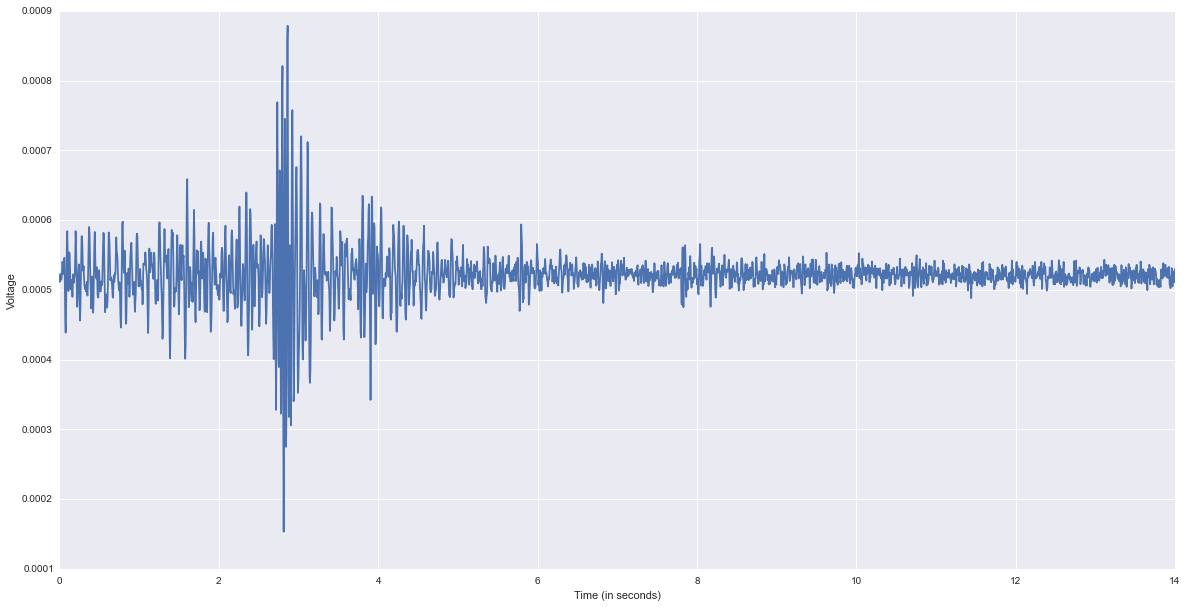

In [8]:
plt.plot(data["Time"],data["Voltage"])

plt.xlabel("Time (in seconds)")

plt.ylabel("Voltage")

plt.show()

## Fourier Transform

In [9]:
from scipy.fftpack import fft

fvolt = fft(data["Voltage"])

freq = np.linspace(0.0, 1.0/(2.0*T), N/2)

## Amplitude Spectrum

/Users/kaustubh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


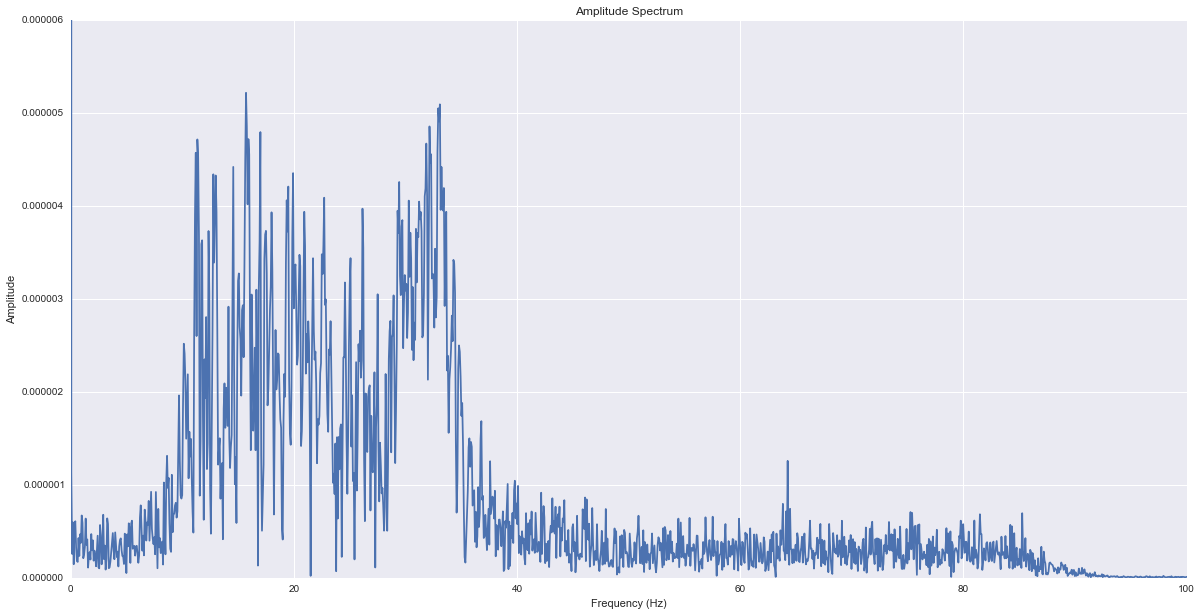

In [10]:
plt.plot(freq, 2.0/N * np.abs(fvolt[0:N/2]))

pylab.ylim([0,0.000006])

plt.xlabel("Frequency (Hz)")

plt.ylabel("Amplitude")

plt.title("Amplitude Spectrum")

plt.show()


## Phase Spectrum

/Users/kaustubh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


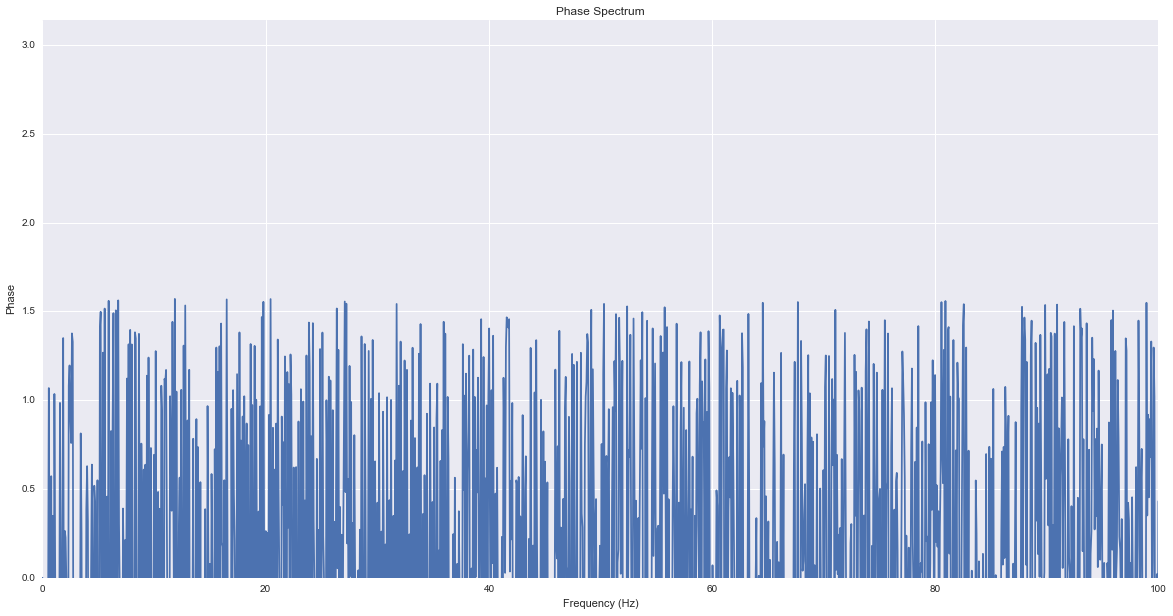

In [11]:
pylab.rcParams['figure.figsize'] = (20, 10)

pylab.ylim([0,np.pi])

phase = [arctan(np.imag(i)/np.real(i)) for i in fvolt[:N/2]]

plt.plot(freq, phase)

# pylab.ylim([0,np.pi/4])

plt.xlabel("Frequency (Hz)")

plt.ylabel("Phase")

plt.title("Phase Spectrum")

# pylab.rcParams['figure.figsize'] = (20, 4)

plt.show()



(array([  2.86567011e-04,  -1.44190899e-03,  -3.81208883e-03, ...,
         -2.97822656e+03,  -2.97822958e+03,  -2.98137087e+03]),
 array([-100.        ,  -99.92857143,  -99.85714286, ...,   99.78571429,
          99.85714286,   99.92857143]),
 <matplotlib.lines.Line2D at 0x108b7d550>)

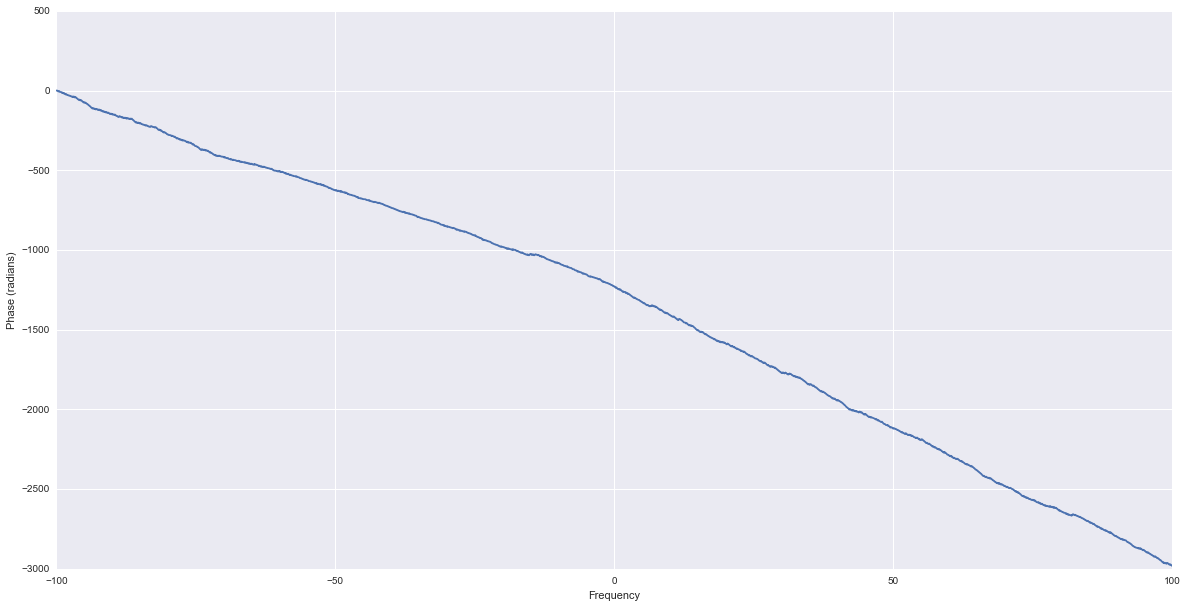

In [12]:
plt.phase_spectrum(fvolt,200)

## Inverse Fourier Transform

/Users/kaustubh/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


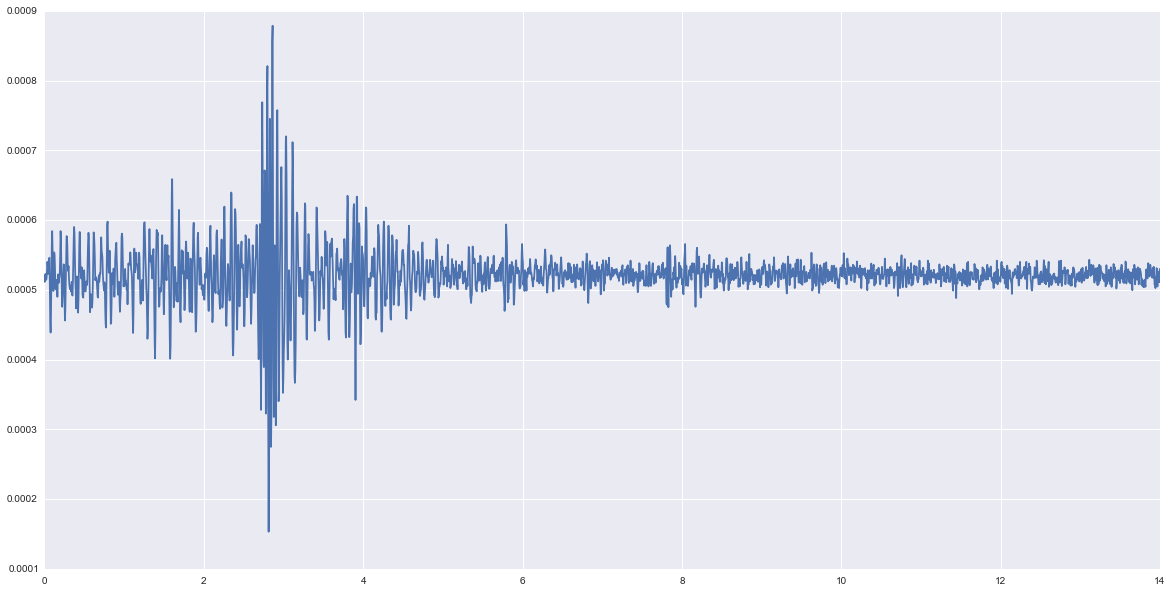

In [13]:
volt = sp.fftpack.ifft(fvolt)

plt.plot(time,volt)

plt.show()

## Short Time Fourier Transform (STFT)

In [14]:
def stft(x, fs, framesz, hop):
    framesamp = int(framesz*fs)
    hopsamp = int(hop*fs)
    w = sp.hanning(framesamp)
    X = sp.array([sp.fft(w*x[i:i+framesamp]) 
                     for i in range(0, len(x)-framesamp, hopsamp)])
    return X

In [15]:
fs = 200        # sampled at 8 kHz
T = 14         # lasting 5 seconds
framesz = 0.10  # with a frame size of 100 milliseconds
hop = 0.05    # and hop size of  milliseconds.

# Create test signal and STFT.
t = sp.linspace(0, T, T*fs, endpoint=False)
volt_stft = stft(data["Voltage"], fs, framesz, hop)

In [16]:
len(volt_stft)

278

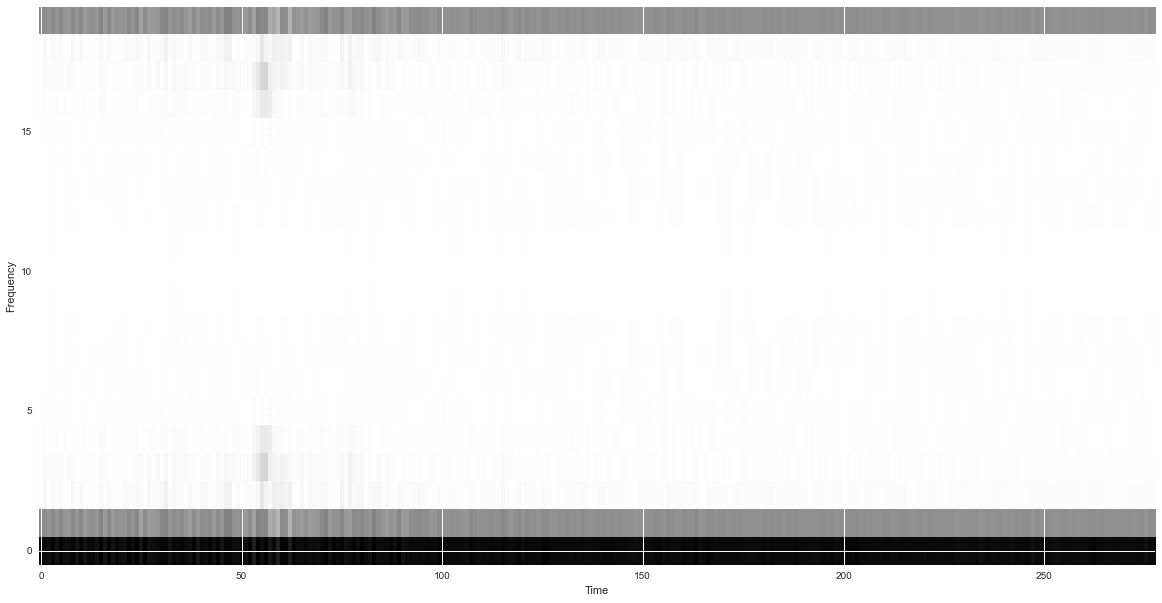

In [17]:
import pylab

pylab.figure()
pylab.imshow(sp.absolute(volt_stft.T), origin='lower', aspect='auto',
             interpolation='nearest')
pylab.xlabel('Time')
pylab.ylabel('Frequency')
pylab.show()

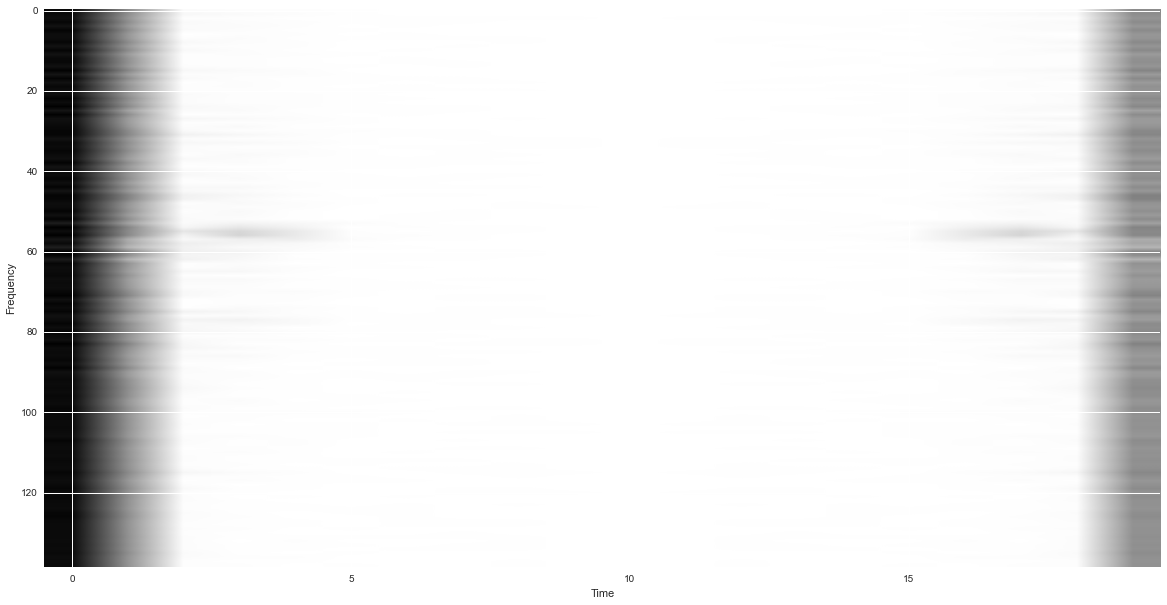

In [18]:
import pylab

pylab.figure()
pylab.imshow(sp.absolute(volt_stft[:139]), origin='upper', aspect='auto',)
pylab.xlabel('Time')
pylab.ylabel('Frequency')
pylab.show()

In [1]:
f = 0
for i in range(len(volt_stft[0:N/2])):
    t = f + 20
    plt.plot(freq[f:t], 2.0/N * np.abs(volt_stft[i]))
    

    pylab.ylim([0,0.000006])

    plt.xlabel("Frequency (Hz)")

    plt.ylabel("Amplitude")

    plt.title("Amplitude Spectrum")

    plt.show()
    
    f = t - 10


    

NameError: name 'volt_stft' is not defined

In [20]:
import scipy.signal

## Hilbert Transform 

In [21]:
import scipy as sp

hilbert_volt = scipy.signal.hilbert(data["Voltage"])

amplitude_envelope = np.abs(hilbert_volt)

instantaneous_phase = np.unwrap(np.angle(hilbert_volt))

instantaneous_frequency = np.diff(instantaneous_phase)/(2.0*np.pi)*S

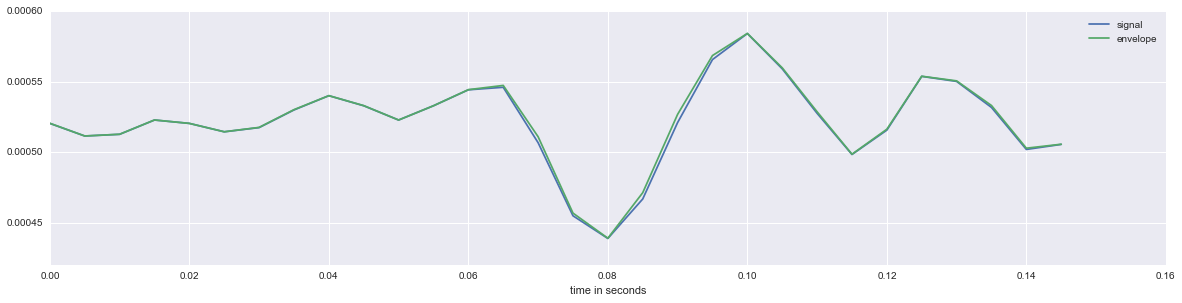

In [22]:
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(list(data["Time"])[:30], list(data["Voltage"])[:30], label='signal')
ax0.plot(list(data["Time"])[:30], amplitude_envelope[:30], label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
# ax1 = fig.add_subplot(212)
# ax1.plot(t[1:], instantaneous_frequency)
# ax1.set_xlabel("time in seconds")
# ax1.set_ylim(0.0, 120.0)

In [23]:
len(data["Time"])

2800

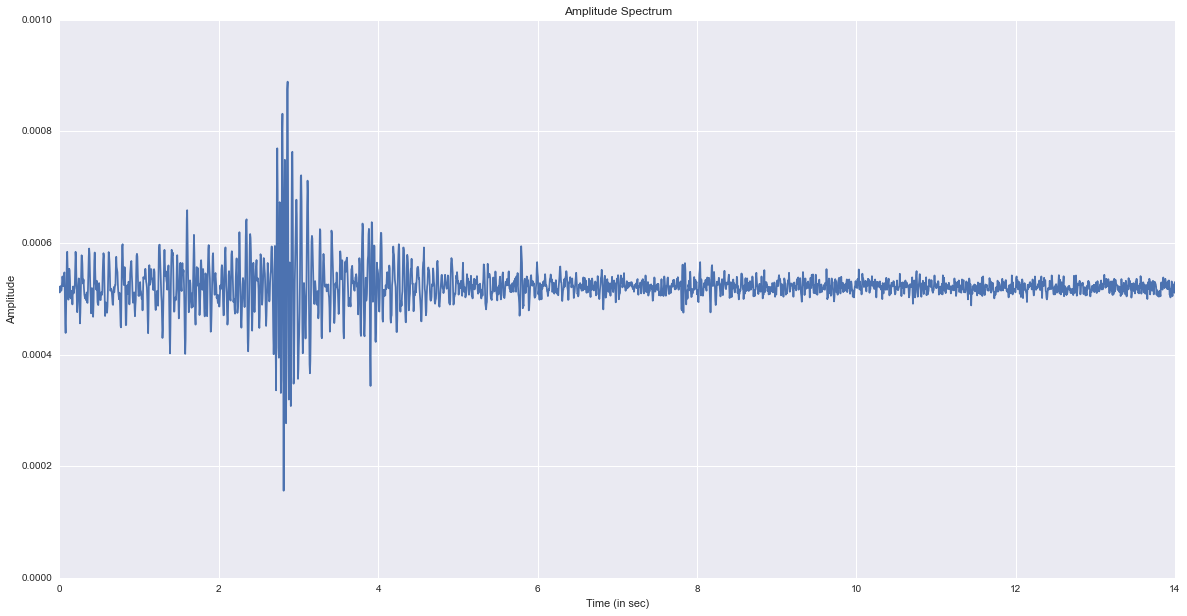

In [24]:
plt.plot(data["Time"], np.abs(hilbert_volt))

pylab.ylim([0,0.001])

plt.xlabel("Time (in sec)")

plt.ylabel("Amplitude")

plt.title("Amplitude Spectrum")

plt.show()

In [25]:
x = data["Time"][:-1]

y = instantaneous_frequency

amplitude = amplitude_envelope[:-1]

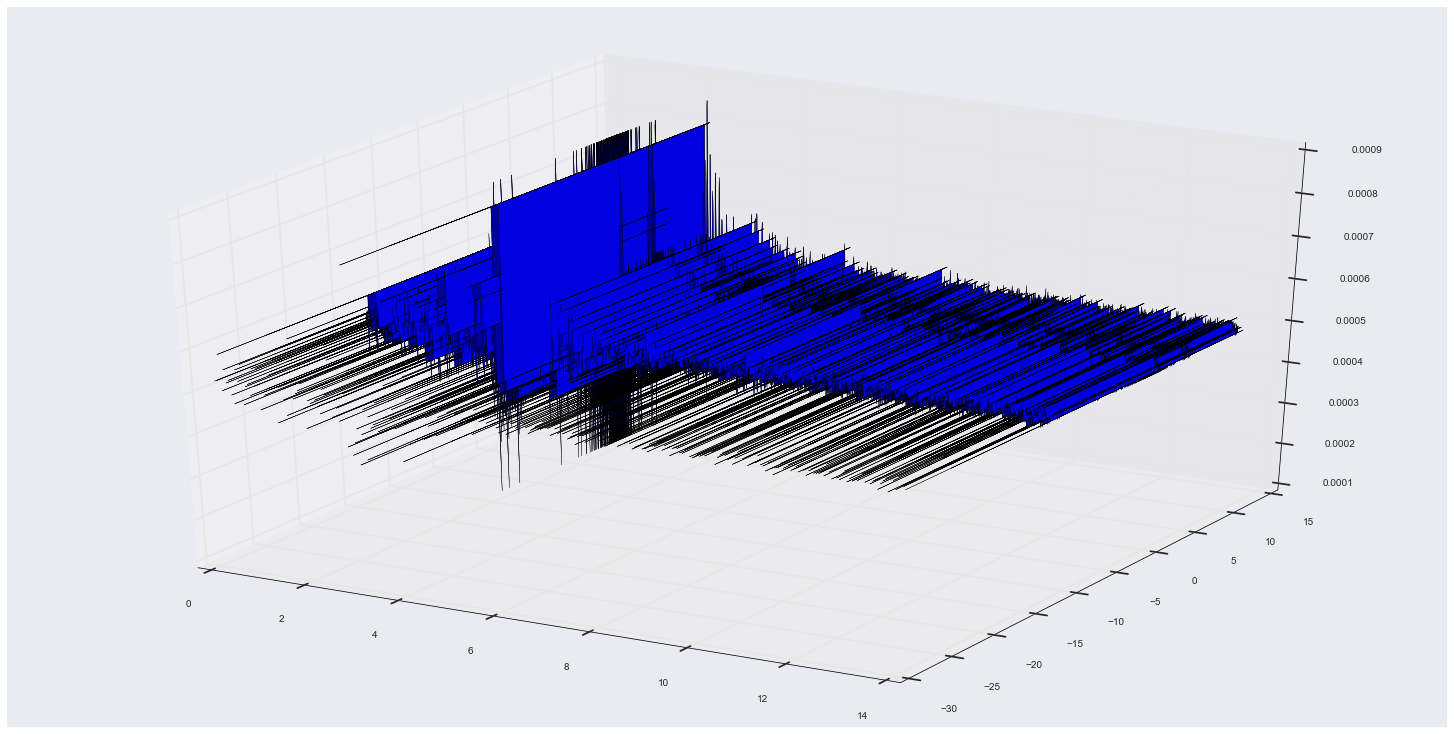

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()

ax = Axes3D(fig)

[x,y] = sp.meshgrid(x,y)

ax.plot_surface(x,y,amplitude,rstride = 10,cstride = 10)

pylab.show()



## Emperical Mode Decomposition 

In [27]:
"""
Empirical Mode Decomposition
"""

import numpy as np
import scipy.interpolate
import scipy.signal

def emd(data,max_modes=10):
    """Calculate the Emprical Mode Decomposition of a signal."""
    # initialize modes
    modes=[]
  
    # perform sifts until we have all modes
    residue=data
    while not _done_sifting(residue):
        # perform a sift
        imf,residue = _do_sift(residue)
        
        # append the imf
        modes.append(imf)

        # see if achieved max
        if len(modes) == max_modes:
            # we have all we wanted
            break
            
    # append the residue
    modes.append(residue)

    # return an array of modes
    return np.asarray(modes)

def eemd(data, noise_std=0.2, num_ensembles=100, num_sifts=10):
    """
    Ensemble Empirical Mode Decomposition (EEMD)
    *** Must still add in post-processing with EMD ***
    """
    # get modes to generate
    num_samples = len(data)
    num_modes = int(np.fix(np.log2(num_samples)))-1

    # normalize incomming data
    dstd = data.std()
    y = data/dstd
    
    # allocate for starting value
    all_modes = np.zeros((num_modes+2,num_samples))
    
    # loop over num_ensembles
    for e in range(num_ensembles):
        # perturb starting data
        x0 = y + np.random.randn(num_samples)*noise_std

        # save the starting value
        all_modes[0] += x0
        
        # loop over modes
        for m in range(num_modes):
            # do the sifts
            imf = x0
            for s in range(num_sifts):
                imf = _do_one_sift(imf)

            # save the imf
            all_modes[m+1] += imf
            
            # set the residual
            x0 = x0 - imf

        # save the final residual
        all_modes[-1] += x0
                
    # average everything out and renormalize
    return all_modes*dstd/np.float64(num_ensembles)
    
def _done_sifting(d):
    """We are done sifting is there a monotonic function."""
    return np.sum(_localmax(d))+np.sum(_localmax(-d))<=2

def _do_sift(data):
    """
    This function is modified to use the sifting-stopping criteria
    from Huang et al (2003) (this is the suggestion of Peel et al.,
    2005).  Briefly, we sift until the number of extrema and
    zerocrossings differ by at most one, then we continue sifting
    until the number of extrema and ZCs both remain constant for at
    least five sifts."""

    # save the data (may have to copy)
    imf=data

    # sift until num extrema and ZC differ by at most 1
    while True:
        imf=_do_one_sift(imf)
        numExtrema,numZC = _analyze_imf(imf)
        #print 'numextrema=%d, numZC=%d' %  (numExtrema, numZC) 
        if abs(numExtrema-numZC)<=1:
            break

    # then continue until numExtrema and ZCs are constant for at least
    # 5 sifts (Huang et al., 2003)
    numConstant = 0
    desiredNumConstant = 5
    lastNumExtrema = numExtrema
    lastNumZC = numZC
    while numConstant < desiredNumConstant:
        imf=_do_one_sift(imf)
        numExtrema,numZC = _analyze_imf(imf)
        if numExtrema == lastNumExtrema and \
                numZC == lastNumZC:
            # is the same so increment
            numConstant+=1
        else:
            # different, so reset
            numConstant = 0
        # save the last extrema and ZC
        lastNumExtrema = numExtrema
        lastNumZC = numZC
        
    # FIX THIS
#     while True:
#         imf = _do_one_sift(imf)
#         numExtrema[end+1],numZC[end+1] = _analyze_imf(imf)
#         print 'FINAL STAGE: numextrema=%d, numZC=%d' % (numExtrema(end), numZC(end))
#         if length(numExtrema)>=numConstant & \
#                 all(numExtrema(end-4:end)==numExtrema(end)) & \
#                 all(numZC(end-4:end)==numZC(end)):
#             break

    # calc the residue
    residue=data-imf

    # return the imf and residue
    return imf,residue


def _do_one_sift(data):

    upper=_get_upper_spline(data)
    lower=-_get_upper_spline(-data)
    #upper=jinterp(find(maxes),data(maxes),xs);
    #lower=jinterp(find(mins),data(mins),xs);

    #imf=mean([upper;lower],1)
    imf = (upper+lower)*.5

    detail=data-imf

    # plot(xs,data,'b-',xs,upper,'r--',xs,lower,'r--',xs,imf,'k-')

    return detail # imf


def _get_upper_spline(data):
    """Get the upper spline using the Mirroring algoirthm from Rilling et
al. (2003)."""

    maxInds = np.nonzero(_localmax(data))[0]

    if len(maxInds) == 1:
        # Special case: if there is just one max, then entire spline
        # is that number
        #s=repmat(data(maxInds),size(data));
        s = np.ones(len(data))*data[maxInds]
        return s

    # Start points
    if maxInds[0]==0:
        # first point is a local max
        preTimes=1-maxInds[1]
        preData=data[maxInds[1]]
    else:
        # first point is NOT local max
        preTimes=1-maxInds[[1,0]]
        preData=data[maxInds[[1,0]]]

    # end points
    if maxInds[-1]==len(data)-1:
        # last point is a local max
        postTimes=2*len(data)-maxInds[-2]-1;
        postData=data[maxInds[-2]];
    else:
        # last point is NOT a local max
        postTimes=2*len(data)-maxInds[[-1,-2]];
        postData=data[maxInds[[-1,-2]]]

    # perform the spline fit
    t=np.r_[preTimes,maxInds,postTimes];
    d2=np.r_[preData, data[maxInds], postData];
    #s=interp1(t,d2,1:length(data),'spline');
    # XXX verify the 's' argument
    # needed to change so that fMRI dat would work
    rep = scipy.interpolate.splrep(t,d2,s=.0)
    s = scipy.interpolate.splev(range(len(data)),rep)
    # plot(1:length(data),data,'b-',1:length(data),s,'k-',t,d2,'r--');  

    return s


def _analyze_imf(d):
    numExtrema = np.sum(_localmax(d))+np.sum(_localmax(-d))
    numZC = np.sum(np.diff(np.sign(d))!=0)
    return numExtrema,numZC

# % if debug
# %   clf
# %   a1=subplot(2,1,1);
# %   plot(xs,d,'b-',xs,upper,'k-',xs,lower,'k-');
# %   axis tight;
  
# %   a2=subplot(2,1,2);
# %   plot(xs,stopScore,'b-',[0 length(d)],[thresh1 thresh1],'k--',[0 length(d)],[thresh2 ...
# %                       thresh2],'r--');
# %   axis tight;
# %   xlabel(sprintf('score = %.3g',s));  
# %   linkaxes([a1 a2],'x')
# %   keyboard
  
# % end



# function yi=jinterp(x,y,xi);
# if length(x)==1
#   yi=repmat(y,size(xi));
# else
#   yi=interp1(x,y,xi,'spline');
# end

  

def _localmax(d):
    """Calculate the local maxima of a vector."""

    # this gets a value of -2 if it is an unambiguous local max
    # value -1 denotes that the run its a part of may contain a local max
    diffvec = np.r_[-np.inf,d,-np.inf]
    diffScore=np.diff(np.sign(np.diff(diffvec)))
                     
    # Run length code with help from:
    #  http://home.online.no/~pjacklam/matlab/doc/mtt/index.html
    # (this is all painfully complicated, but I did it in order to avoid loops...)

    # here calculate the position and length of each run
    runEndingPositions=np.r_[np.nonzero(d[0:-1]!=d[1:])[0],len(d)-1]
    runLengths = np.diff(np.r_[-1, runEndingPositions])
    runStarts=runEndingPositions-runLengths + 1

    # Now concentrate on only the runs with length>1
    realRunStarts = runStarts[runLengths>1]
    realRunStops = runEndingPositions[runLengths>1]
    realRunLengths = runLengths[runLengths>1]

    # save only the runs that are local maxima
    maxRuns=(diffScore[realRunStarts]==-1) & (diffScore[realRunStops]==-1)

    # If a run is a local max, then count the middle position (rounded) as the 'max'
    # CHECK THIS
    maxRunMiddles=np.round(realRunStarts[maxRuns]+realRunLengths[maxRuns]/2.)-1

    # get all the maxima
    maxima=(diffScore==-2)
    maxima[maxRunMiddles.astype(np.int32)] = True

    return maxima

#%make sure beginning & end are not local maxes
#%maxima([1 end])=false;


def calc_inst_info(modes,samplerate):
    """
    Calculate the instantaneous frequency, amplitude, and phase of
    each mode.
    """

    amp=np.zeros(modes.shape,np.float32);
    phase=np.zeros(modes.shape,np.float32);
    f=np.zeros(modes.shape,np.float32);

    for m in range(len(modes)):
        h=scipy.signal.hilbert(modes[m]);
        amp[m,:]=np.abs(h);
        phase[m,:]=np.angle(h);
        f[m,:] = np.r_[np.nan, 
                      0.5*(np.angle(-h[2:]*np.conj(h[0:-2]))+np.pi)/(2*np.pi) * samplerate,
                      np.nan]

        #f(m,:) = [nan 0.5*(angle(-h(t+1).*conj(h(t-1)))+pi)/(2*pi) * sr nan];
    
    # calc the freqs (old way)
    #f=np.diff(np.unwrap(phase[:,np.r_[0,0:len(modes[0])]]))/(2*np.pi)*samplerate

    # clip the freqs so they don't go below zero
    #f = f.clip(0,f.max())

    return f,amp,phase


In [28]:
emd_data = emd(data["Voltage"])

In [29]:
time = list(data["Time"])[:int(N)/2]

In [30]:
N

2800.0

/Users/kaustubh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


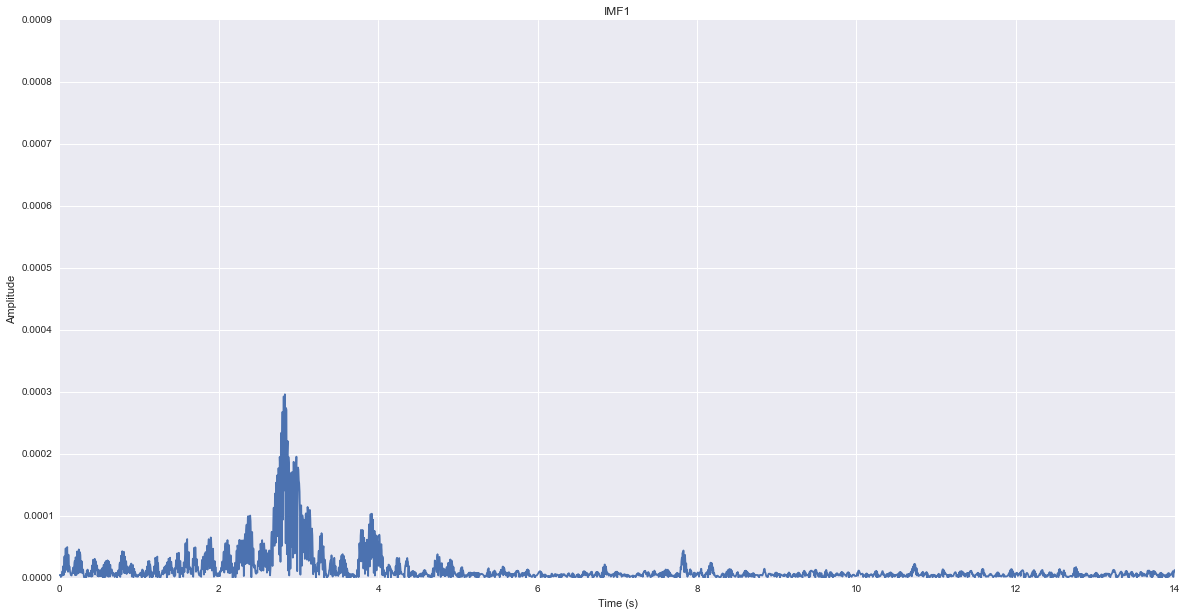

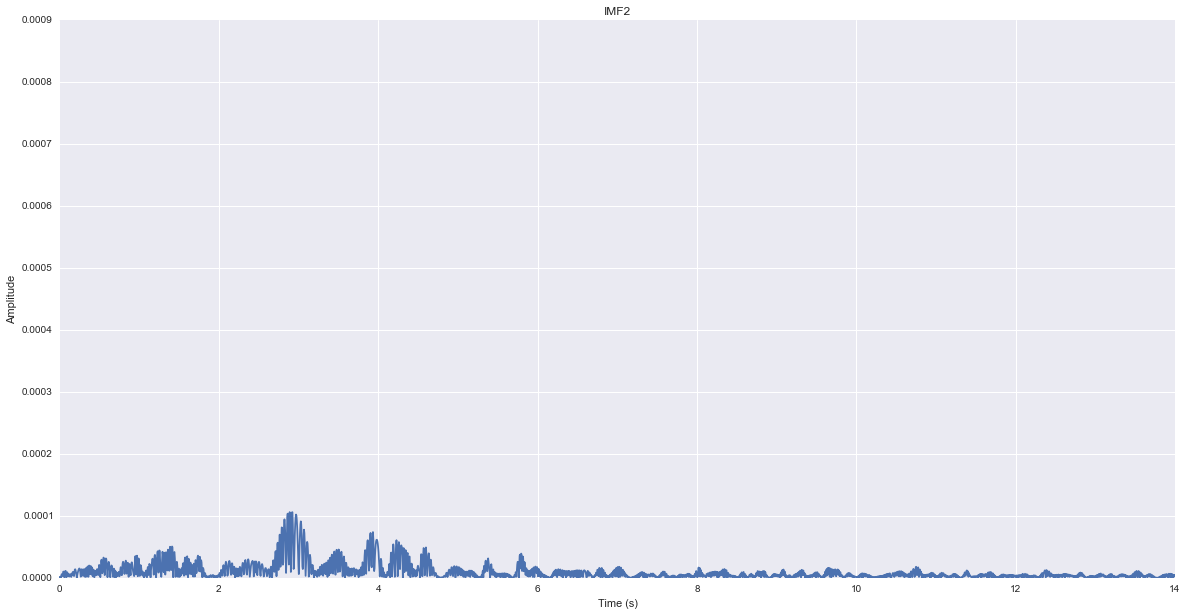

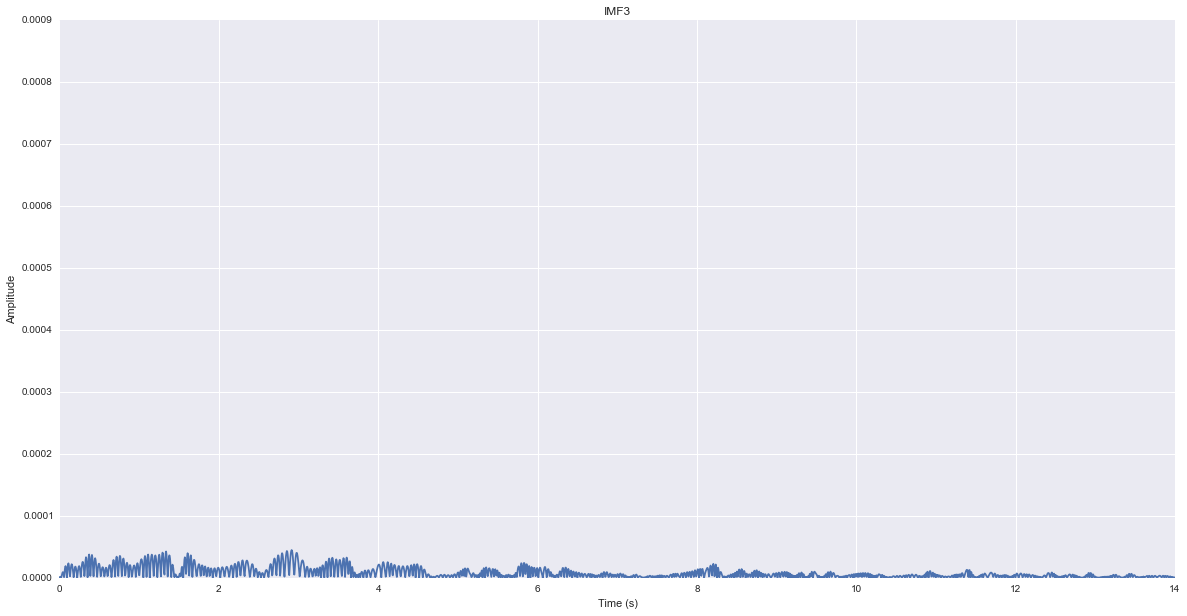

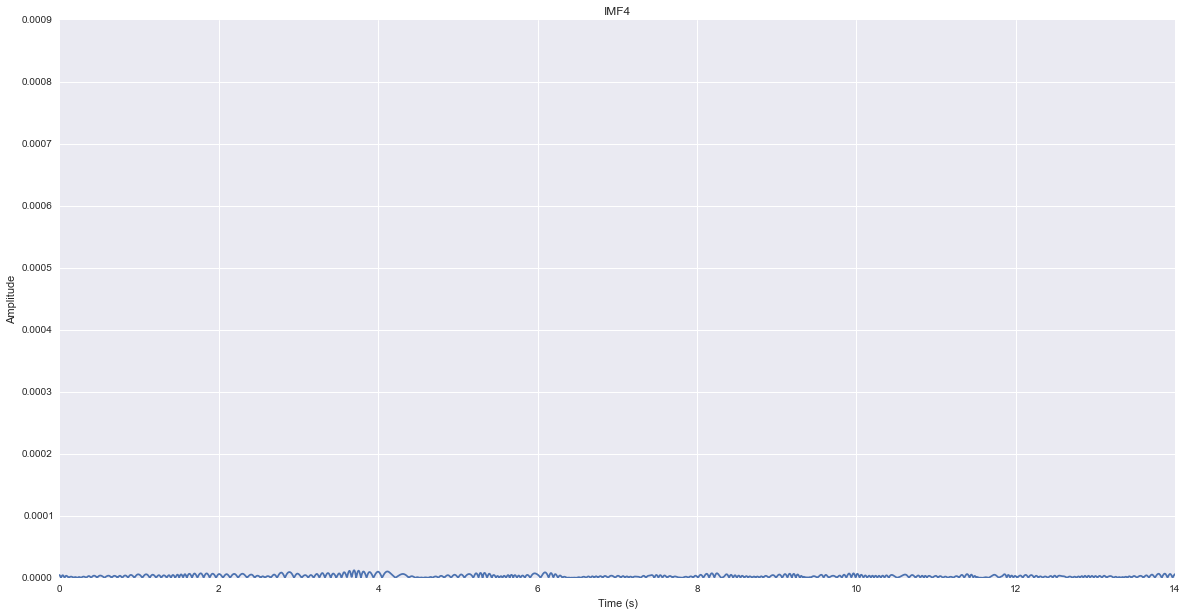

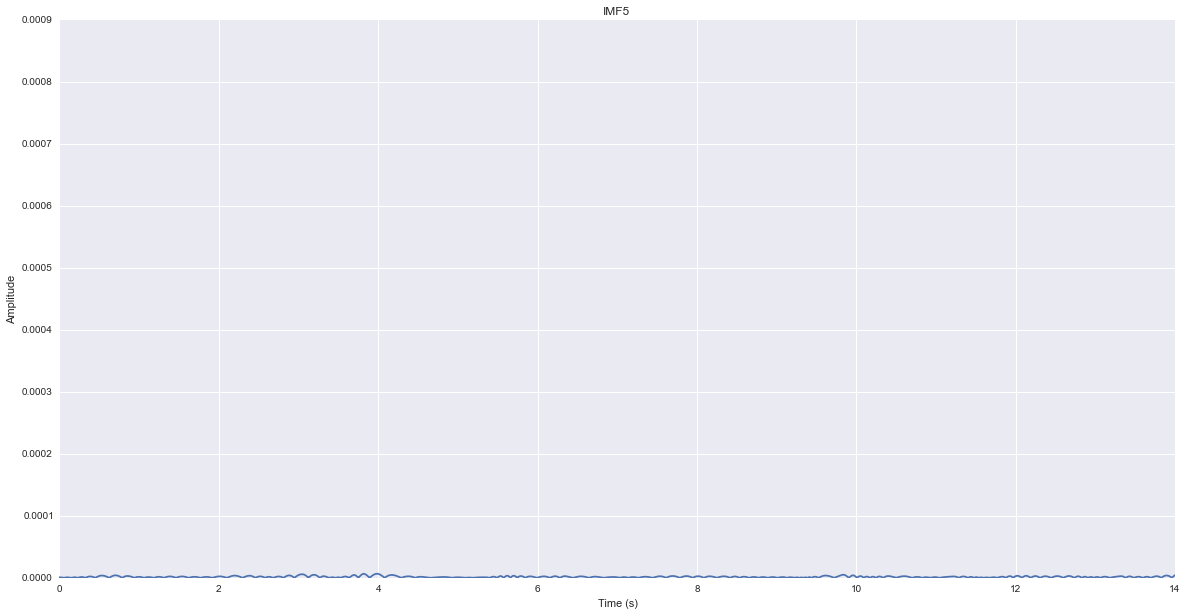

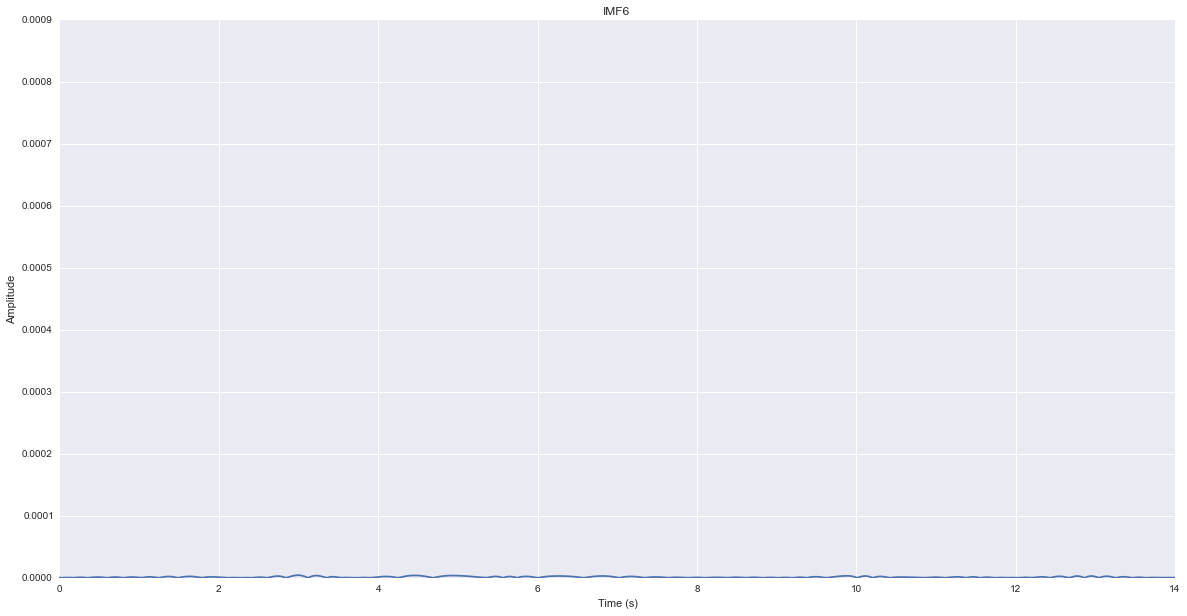

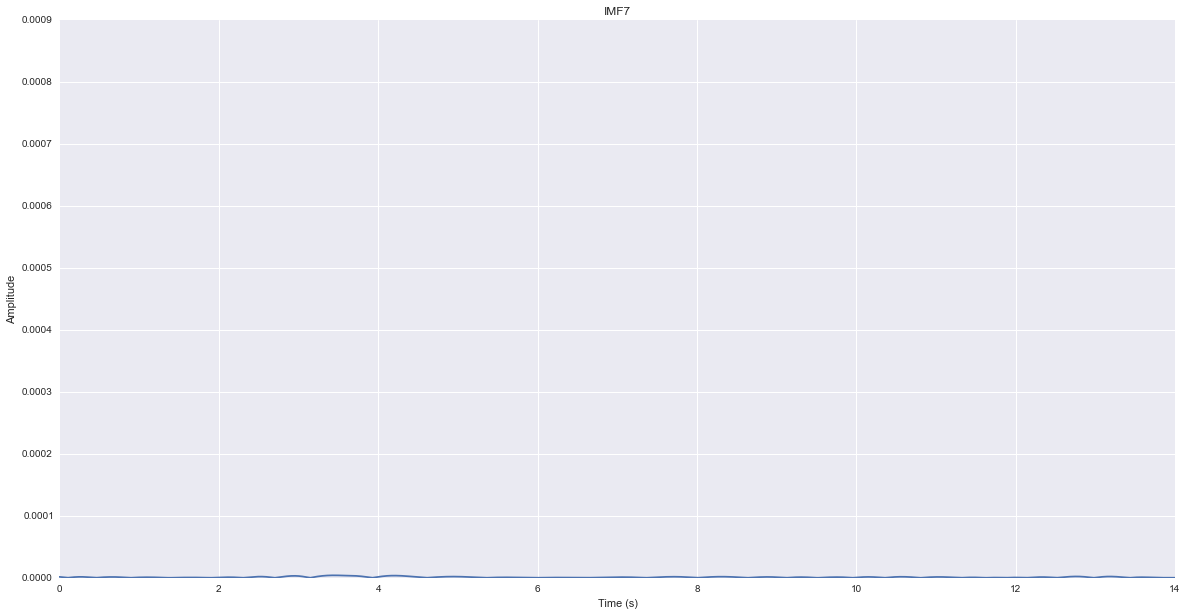

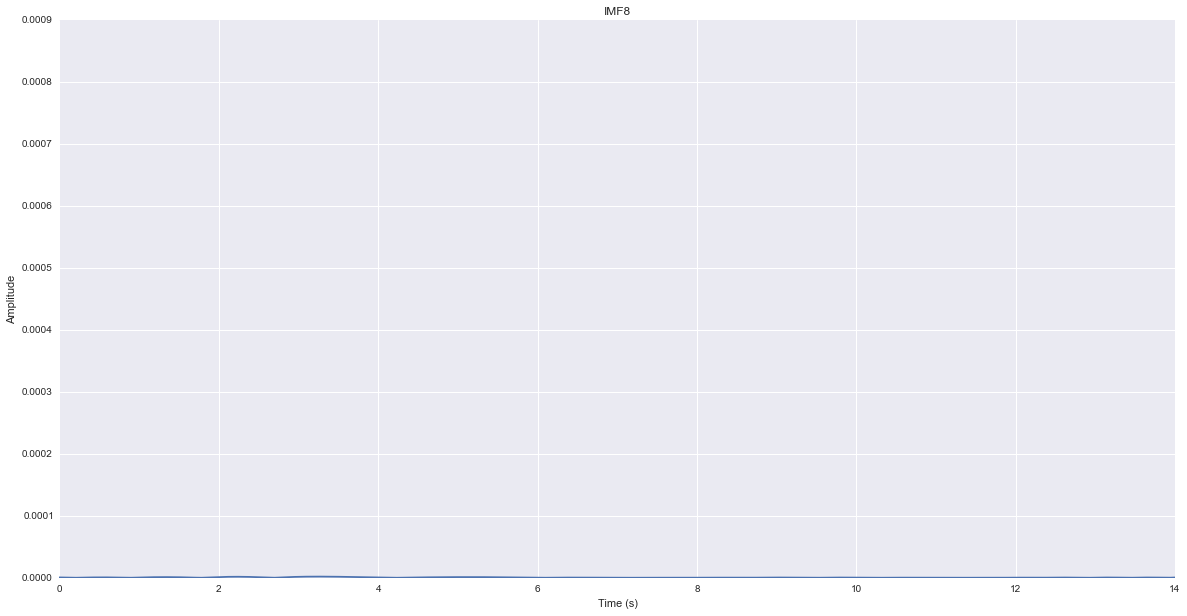

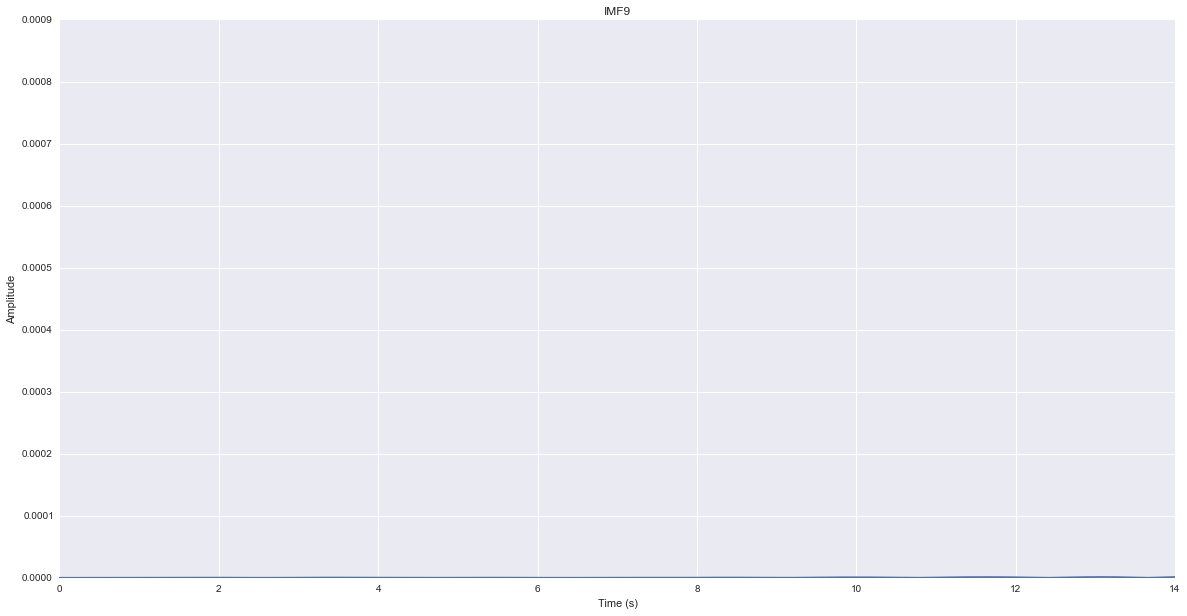

In [33]:
for i in range(len(emd_data)-2):
    plt.plot(data["Time"], np.abs(emd_data[i][:N]))

    pylab.ylim([0,0.0009])

    plt.xlabel("Time (s)")

    plt.ylabel("Amplitude")
    
    title = "IMF" + str(i + 1)

    plt.title(title)

    plt.show()



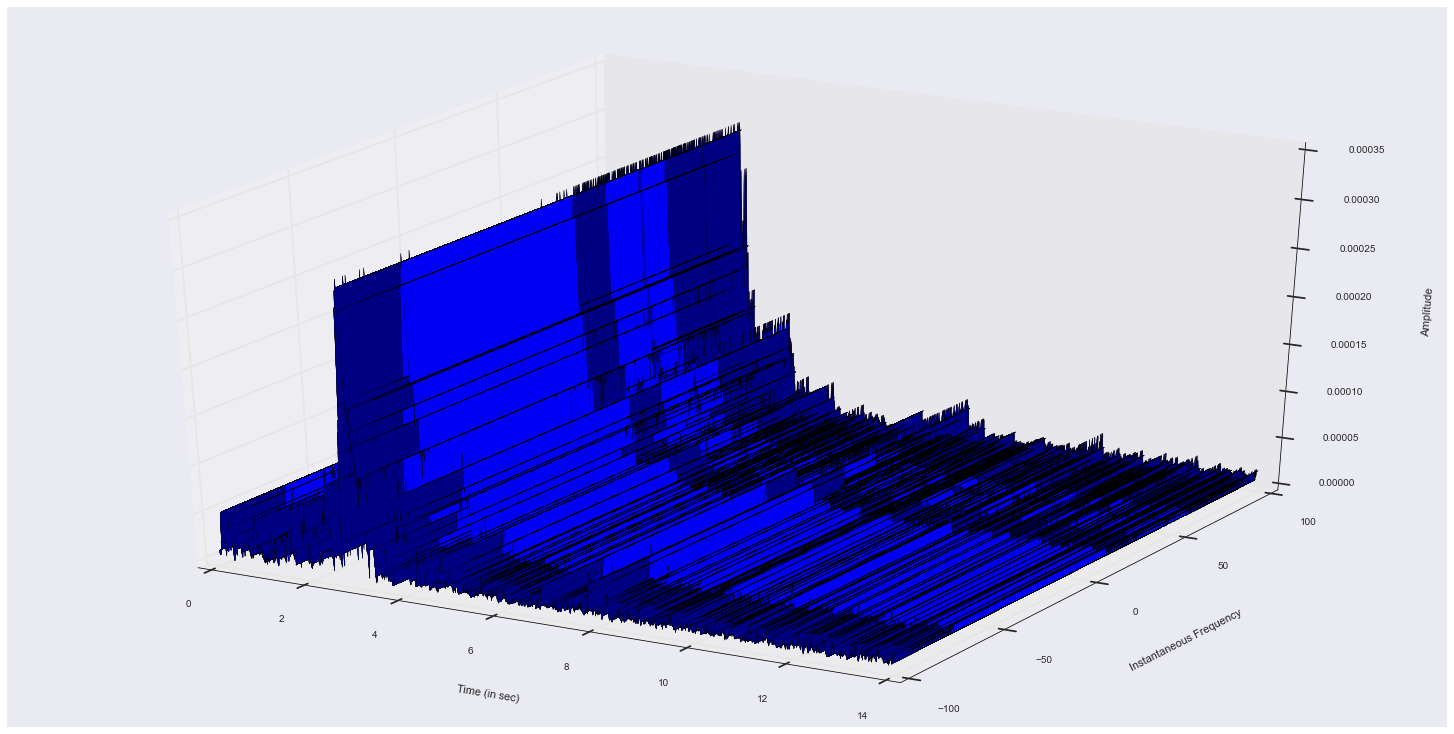

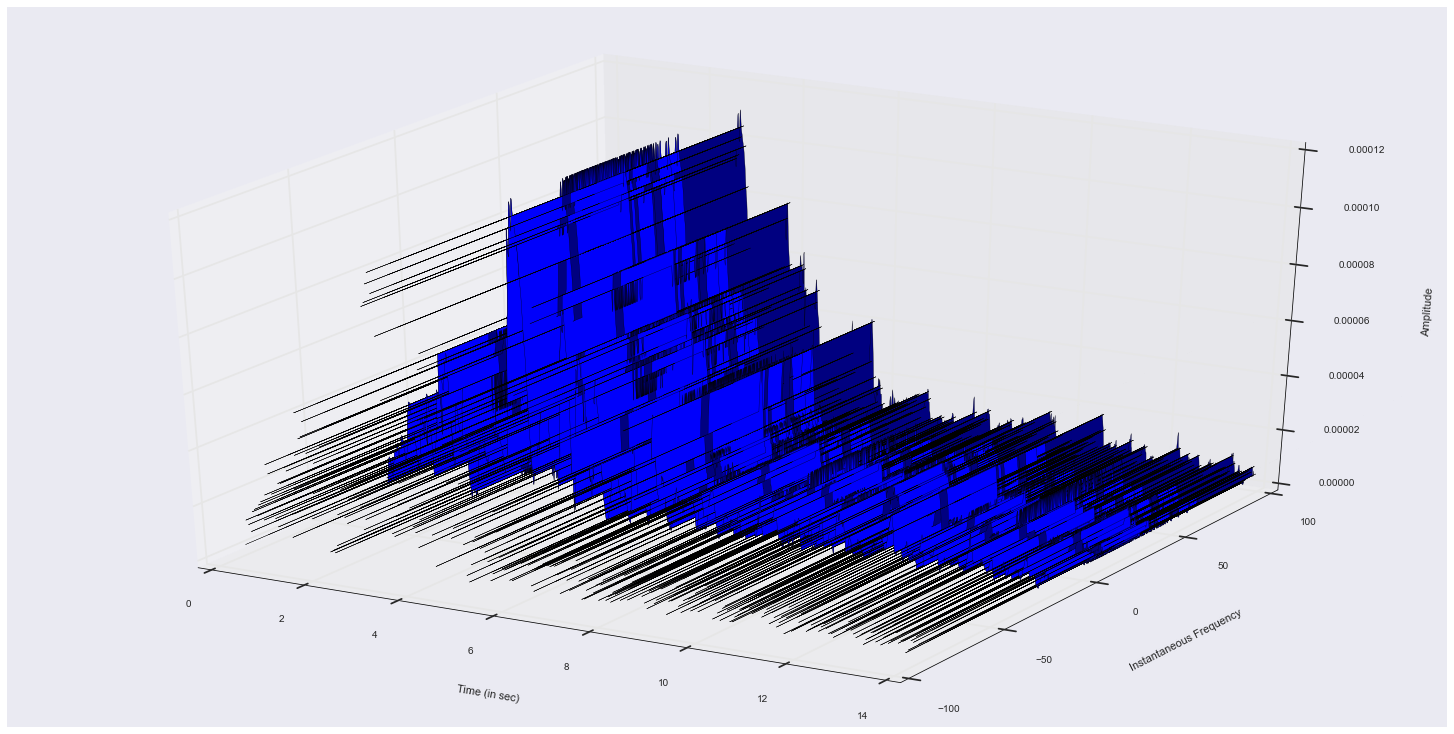

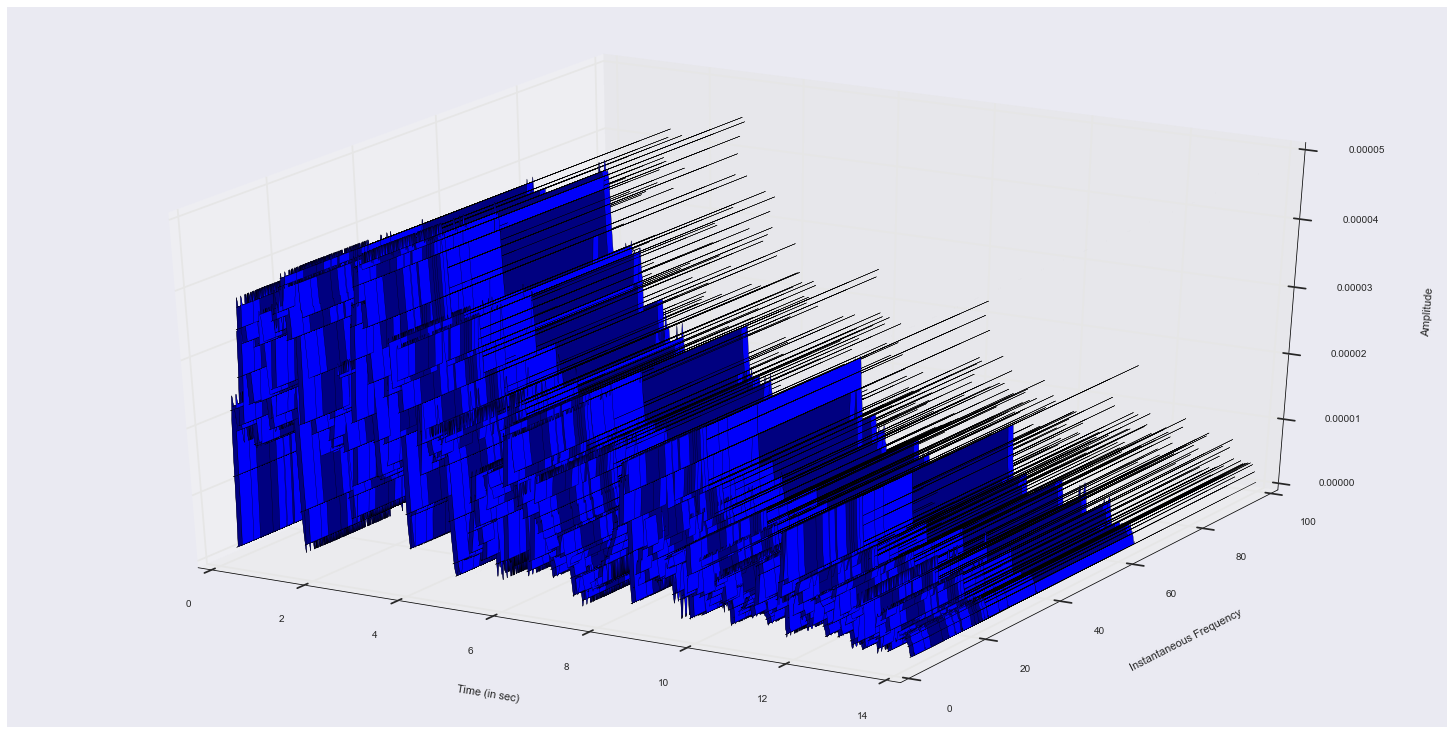

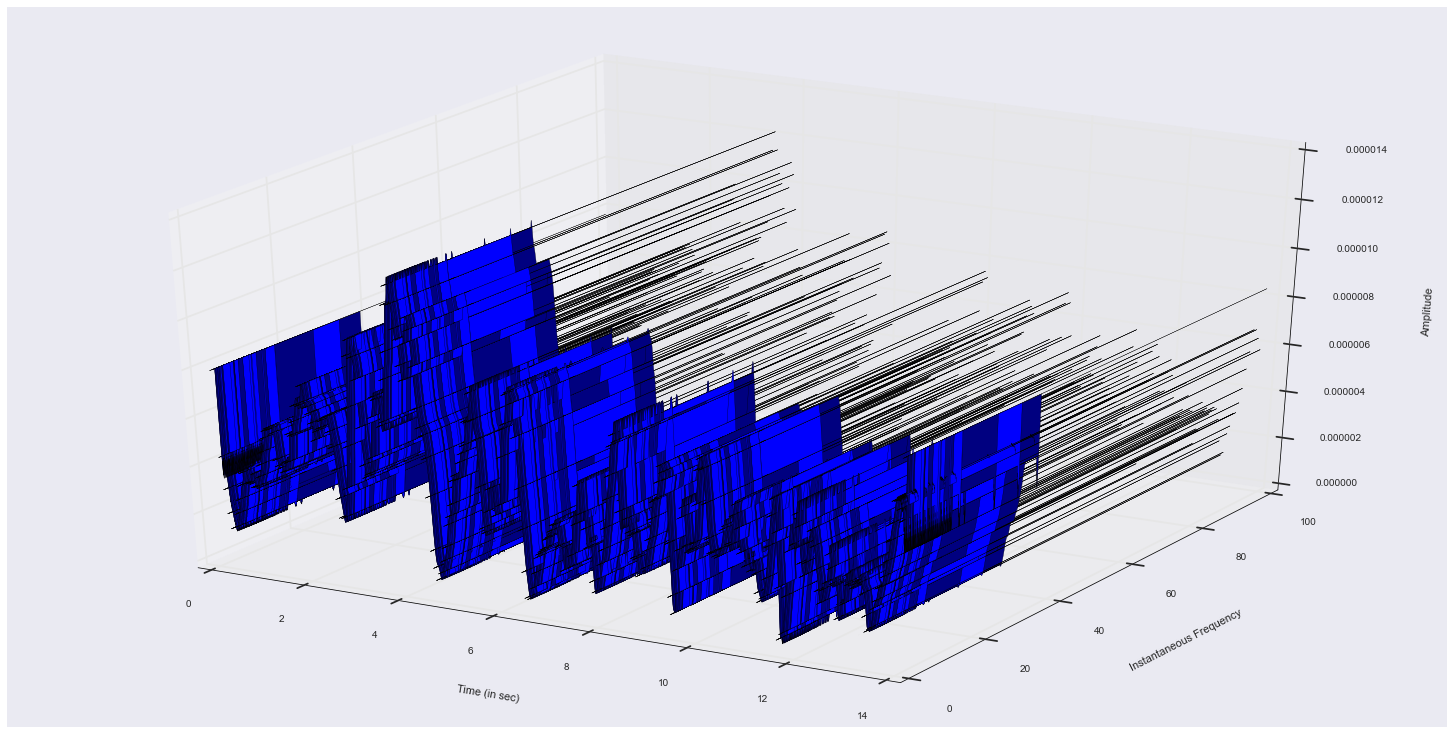

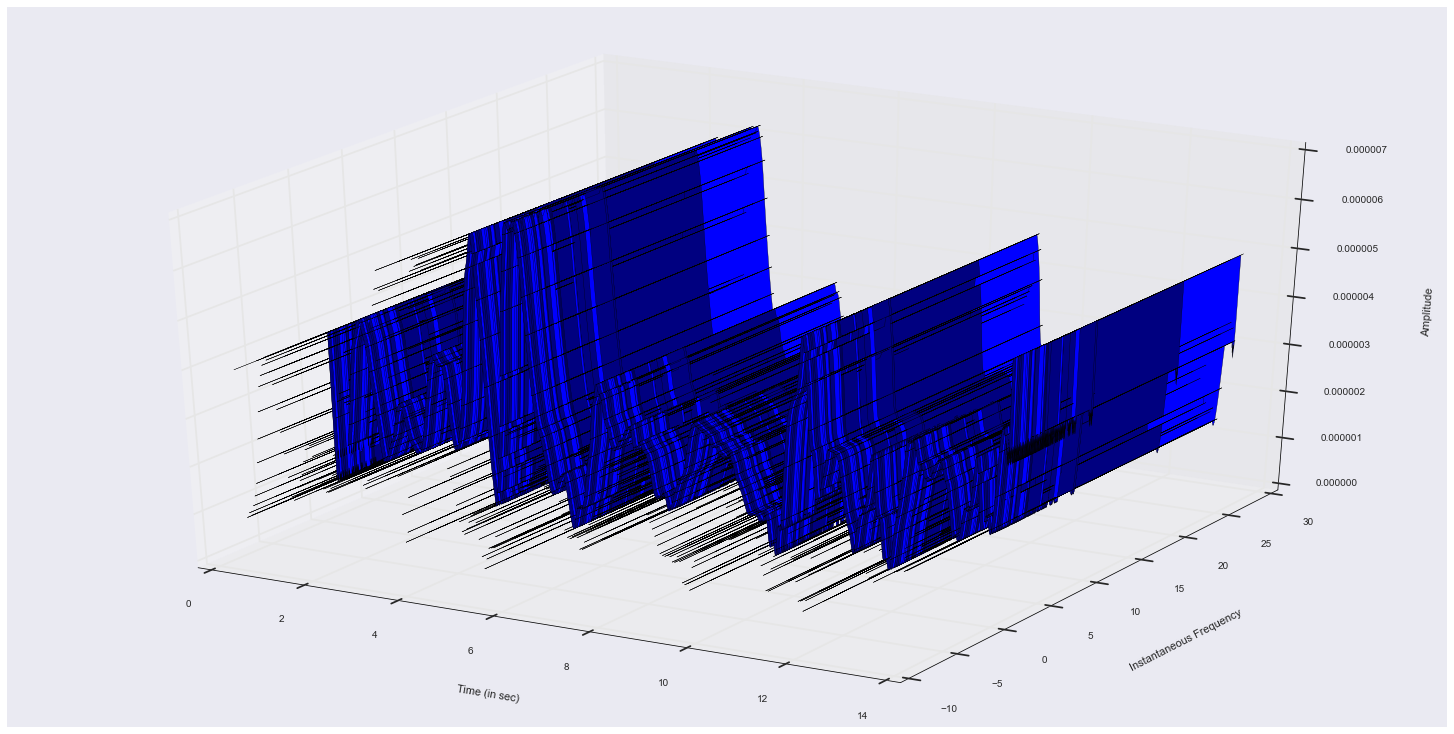

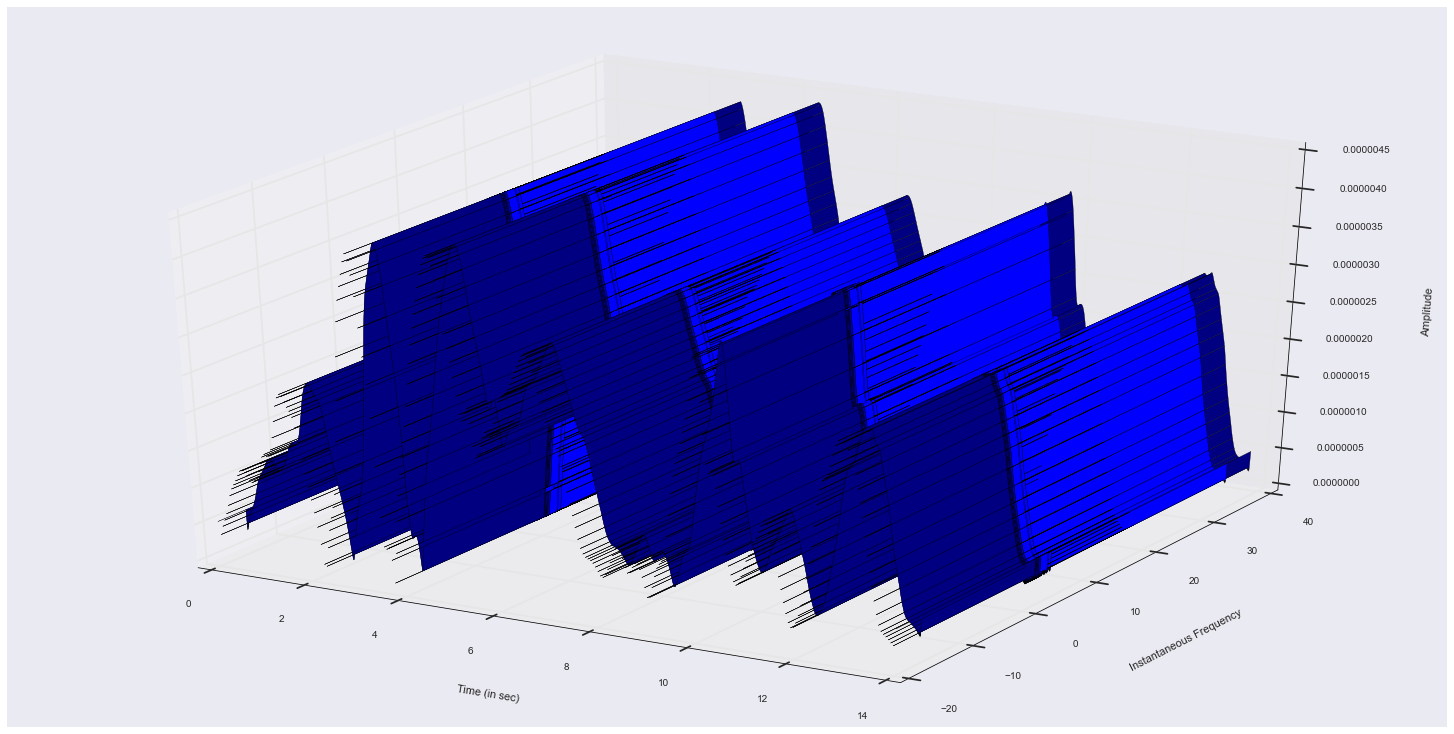

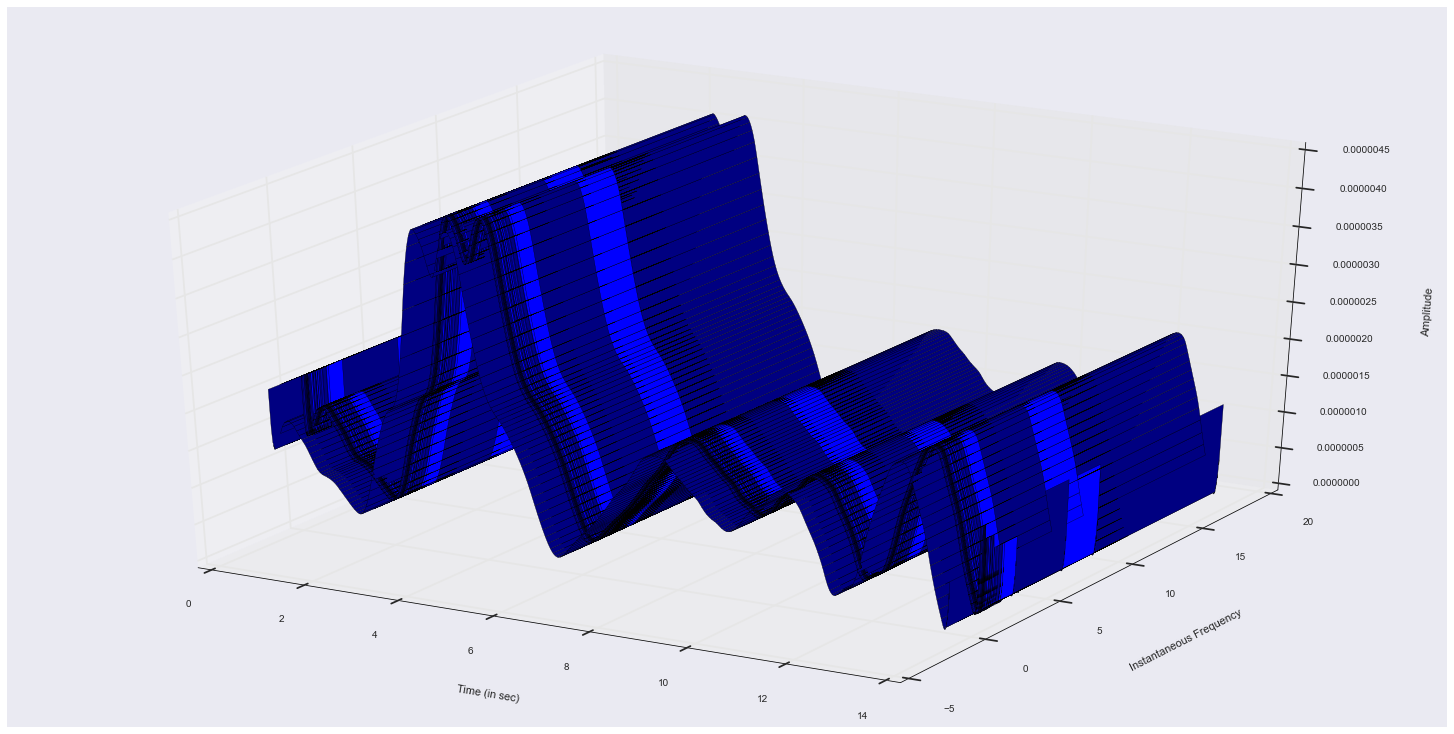

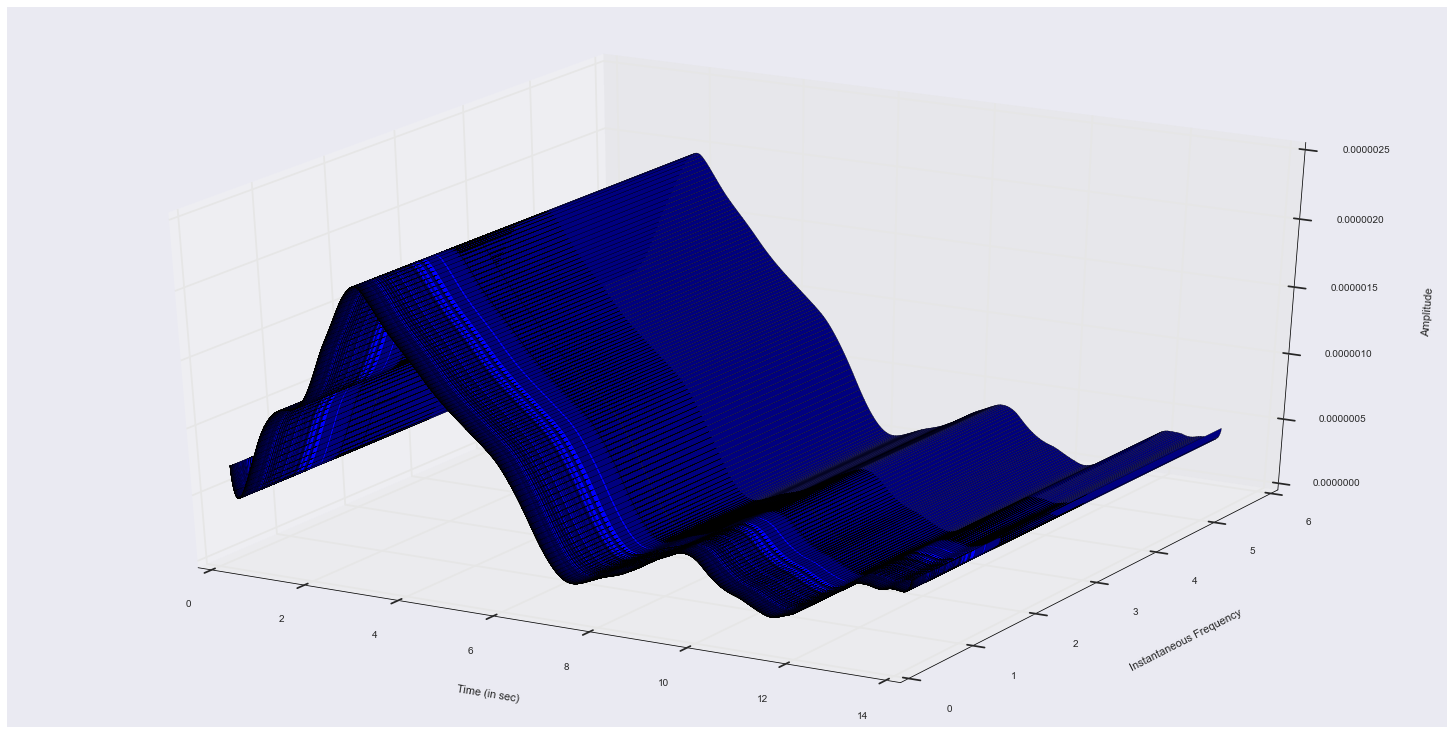

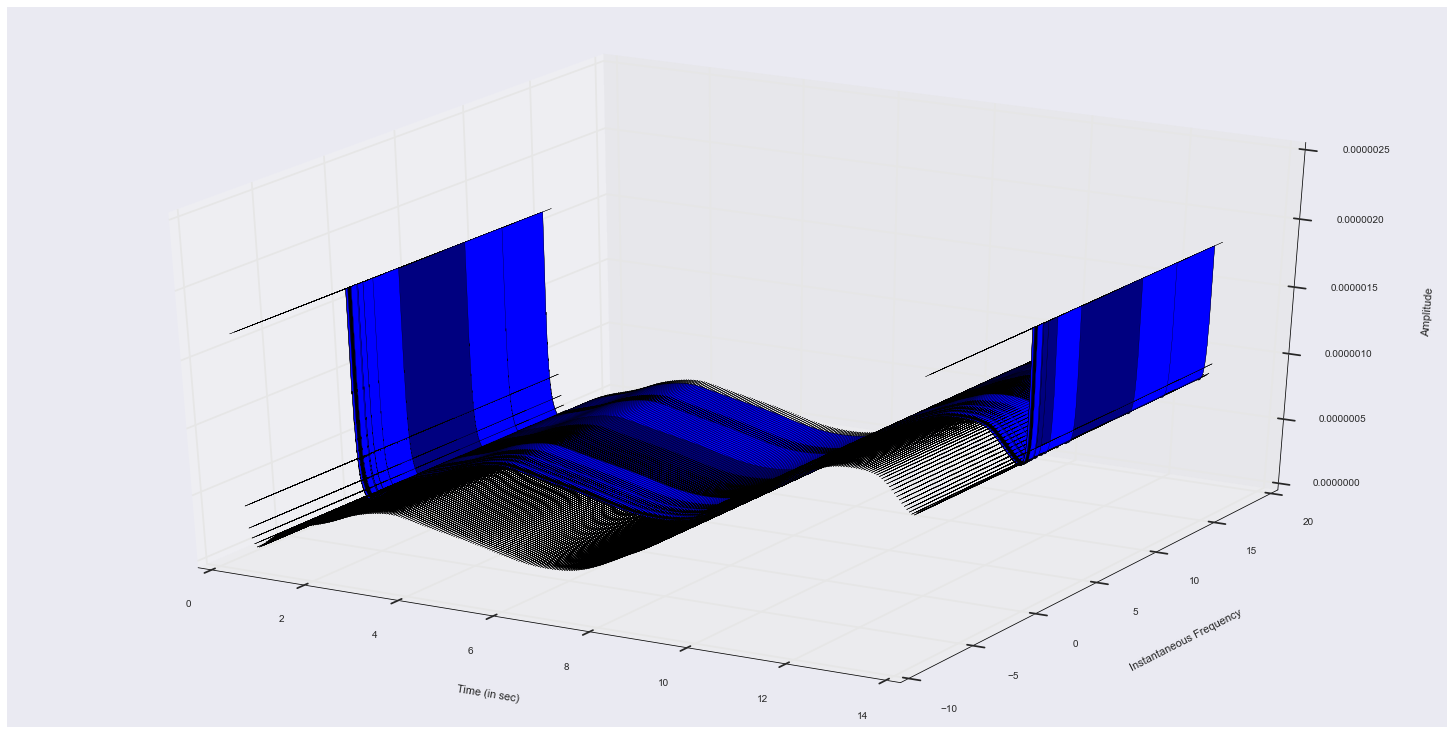

In [35]:
for i in range(len(emd_data)-2):
    imf_hilbert = scipy.signal.hilbert(emd_data[i])

    amplitude_envelope = np.abs(imf_hilbert)

    instantaneous_phase = np.unwrap(np.angle(imf_hilbert))

    instantaneous_frequency = np.diff(instantaneous_phase)/(2.0*np.pi)*S

    x = data["Time"]

    y = instantaneous_frequency

    amplitude = amplitude_envelope

    pylab.rcParams['figure.figsize'] = (20, 10)

    fig = pylab.figure()

    ax = Axes3D(fig)

    [x,y] = sp.meshgrid(x,y)

    # ax.plot_surface(x,y,amplitude,cmap = 20)


    ax.plot_surface(x, y, amplitude, rstride=10, cstride=10)

    ax.set_xlabel("Time (in sec)")

    ax.set_ylabel("Instantaneous Frequency")

    ax.set_zlabel("Amplitude")



    plt.show()





In [36]:
imf = pd.DataFrame()

imf["Time"] = list(data["Time"])[:-1]

imf["Frequency"] = instantaneous_frequency

imf["amplitude"] = amplitude_envelope[:-1]

imf.to_csv("imf.csv",encoding = 'utf-8')

In [37]:
signal = emd_data[0]
for i in range(1,len(emd_data)):
    signal = signal + emd_data[i]
    

In [38]:
signal

array([ 0.00052035,  0.00051141,  0.0005126 , ...,  0.00051558,
        0.00051081,  0.00052989])

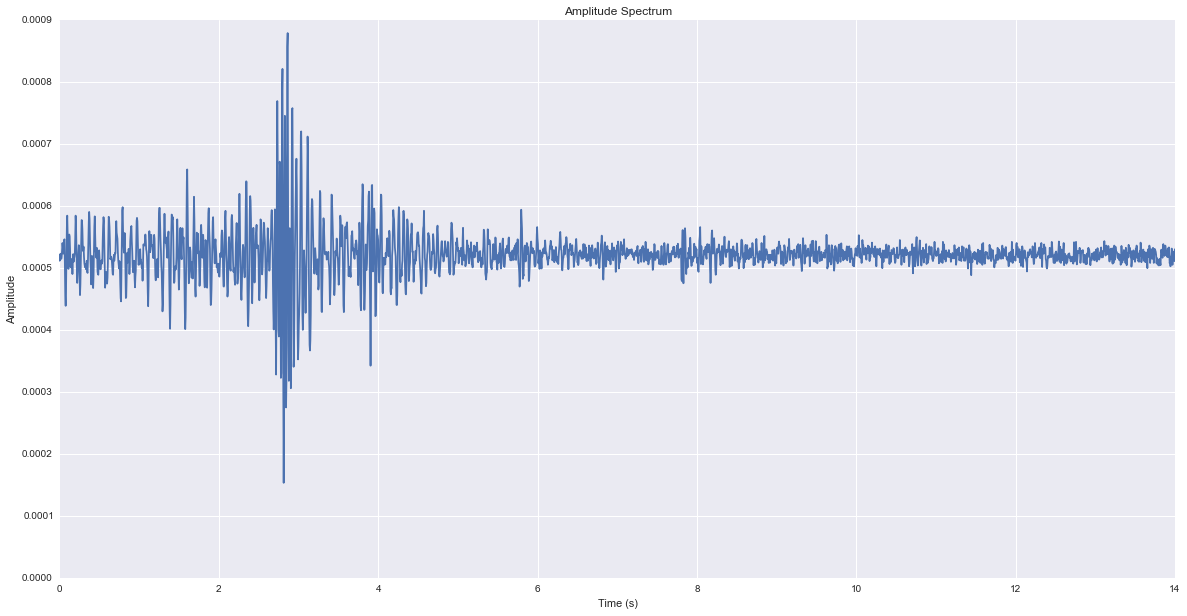

In [40]:
plt.plot(data["Time"], np.abs(signal))

pylab.ylim([0,0.0009])

plt.xlabel("Time (s)")

plt.ylabel("Amplitude")

plt.title("Amplitude Spectrum")

plt.show()